<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/Plants_detection_for_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### Detecção de plantas em imagens para agricultura

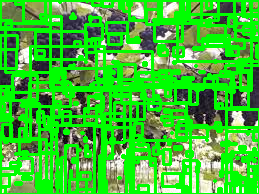

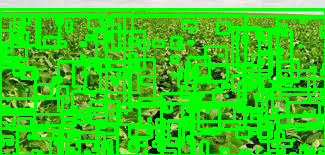

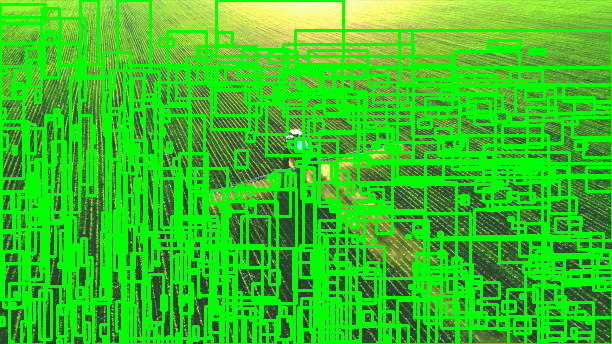

In [4]:
# A Função detecta e destaca plantas em uma imagem agrícola

def detect_plants(image_path):
    # Carregando a imagem
    image = cv2.imread(image_path)
    if image is None:
        print("Imagem não encontrada!")
        return

    # Converte a imagem para escala de cinza
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicamos um filtro Gaussiano para reduzir o ruído
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Detecta as bordas usando o operador Canny
    edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

    # Faz os contornos na imagem
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Cria uma cópia da imagem para desenhar os retângulos delimitadores
    image_with_rectangles = image.copy()

    # Desenha retângulos delimitadores em torno dos contornos (plantas)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Exibindo a imagem original com os retângulos delimitadores
    cv2_imshow(image_with_rectangles)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":

    image_path = "/content/parreiras.jpg"
    detect_plants(image_path)
    image_path = "/content/soja.jpg"
    detect_plants(image_path)
    image_path ="/content/trigo.jpg"
    detect_plants(image_path)
